                          diversity  diversity_percent_change  \
diversity                  1.000000                  0.094688   
diversity_percent_change   0.094688                  1.000000   
tons_percent_change        0.041206                  0.103528   

                          tons_percent_change  
diversity                            0.041206  
diversity_percent_change             0.103528  
tons_percent_change                  1.000000  


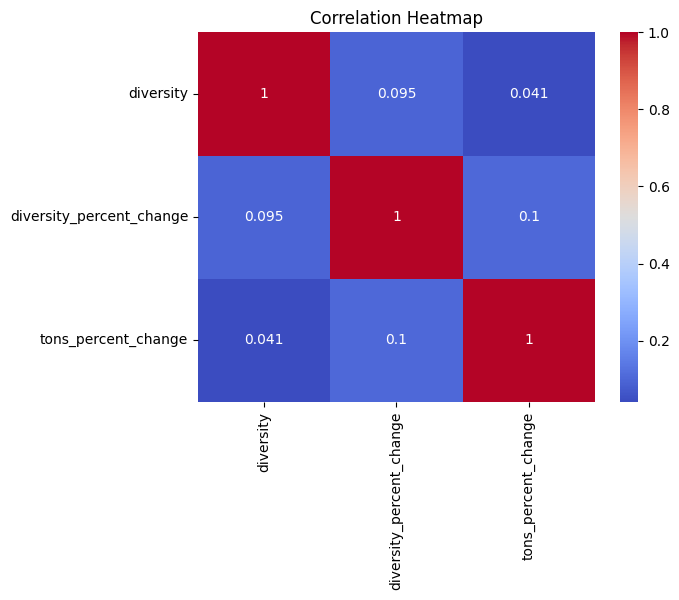

Mean Squared Error: 60.08758793651686
R-squared Score: 0.07489936545517695


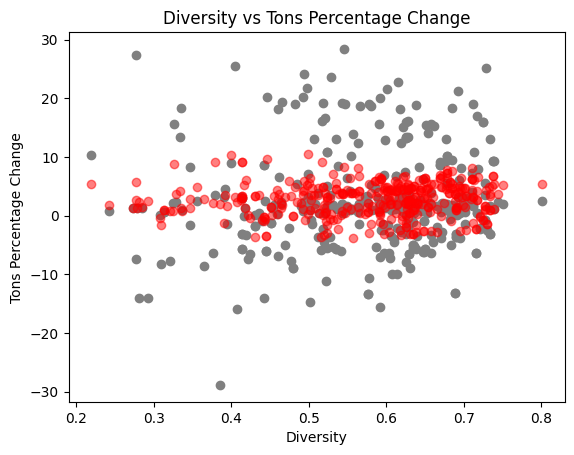

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('./final_agg_data.csv')

# Correlation Analysis
correlation_matrix = df[['diversity', 'diversity_percent_change', 'tons_percent_change']].corr()
print(correlation_matrix)

# Visualize the correlation with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Regression Analysis
# Selecting features and target variable
features = ['diversity', 'diversity_percent_change', 'FAH_percent_change', 'FAFH_percent_change', 'NUMBER_OF_EVENTS_percent_change', 'DAMAGE_PROPERTY_percent_change']
target = 'tons_percent_change'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plotting the regression line for 'diversity' vs 'tons_percent_change'
plt.scatter(X_test['diversity'], y_test, color='gray')
plt.scatter(X_test['diversity'], y_pred, color='red', alpha=0.5)
plt.title('Diversity vs Tons Percentage Change')
plt.xlabel('Diversity')
plt.ylabel('Tons Percentage Change')
plt.show()


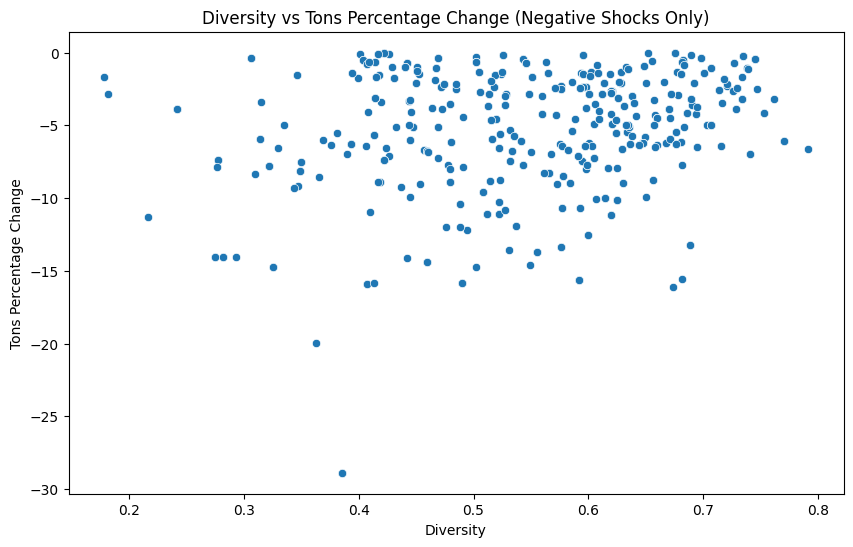

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./final_agg_data.csv')

# Filter for only negative tons percentage changes
df_negative_shocks = df[df['tons_percent_change'] < 0]

# Plotting the relationship between diversity and tons percentage change
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diversity', y='tons_percent_change', data=df_negative_shocks)
plt.title('Diversity vs Tons Percentage Change (Negative Shocks Only)')
plt.xlabel('Diversity')
plt.ylabel('Tons Percentage Change')
plt.show()


/var/folders/39/fd0b_c_x38bdd82wjr36qcf80000gn/T/ipykernel_9637/3985956307.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_change_by_diversity = df.groupby('diversity_category')['tons_percent_change'].mean().reset_index()


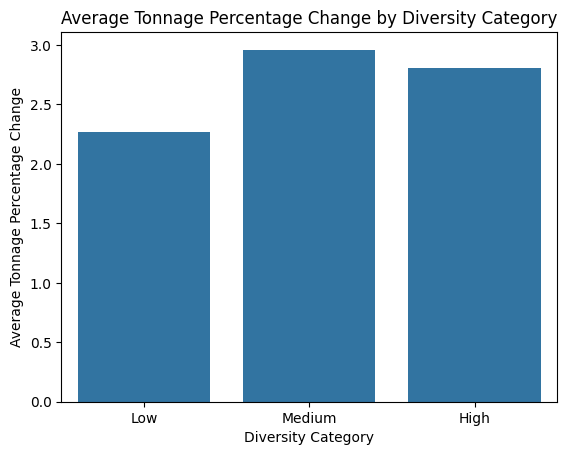

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./final_agg_data.csv')

# Categorize diversity scores into bins
diversity_bins = pd.qcut(df['diversity'], q=3, labels=['Low', 'Medium', 'High'])
df['diversity_category'] = diversity_bins

# Calculate the average percentage change in tonnage for each diversity category
average_change_by_diversity = df.groupby('diversity_category')['tons_percent_change'].mean().reset_index()

# Plot the averages as a bar chart
sns.barplot(x='diversity_category', y='tons_percent_change', data=average_change_by_diversity)
plt.title('Average Tonnage Percentage Change by Diversity Category')
plt.xlabel('Diversity Category')
plt.ylabel('Average Tonnage Percentage Change')
plt.show()


In [20]:
import pandas as pd
from scipy.stats import pearsonr

# Load your data (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('./final_agg_data.csv')

# Ensure that 'tons_percent_change' and 'diversity' are in the correct format
df['tons_percent_change'] = pd.to_numeric(df['tons_percent_change'], errors='coerce')
df['diversity'] = pd.to_numeric(df['diversity'], errors='coerce')

# Define a supply chain shock: tonnage percentage decrease by at least 5%
df['supply_chain_shock'] = df['tons_percent_change'] <= -20

# Calculate the correlation
# Note: Pearson correlation is used here, but you might want to consider other types of correlations depending on your data characteristics
correlation, p_value = pearsonr(df['diversity'], df['supply_chain_shock'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation:
# A positive correlation coefficient indicates that higher diversity is associated with a higher likelihood of supply chain shocks.
# A negative correlation coefficient indicates that higher diversity is associated with a lower likelihood of supply chain shocks.
# The p-value tells you whether this correlation is statistically significant.


Correlation coefficient: -0.05452423540303386
P-value: 0.01821832798704618


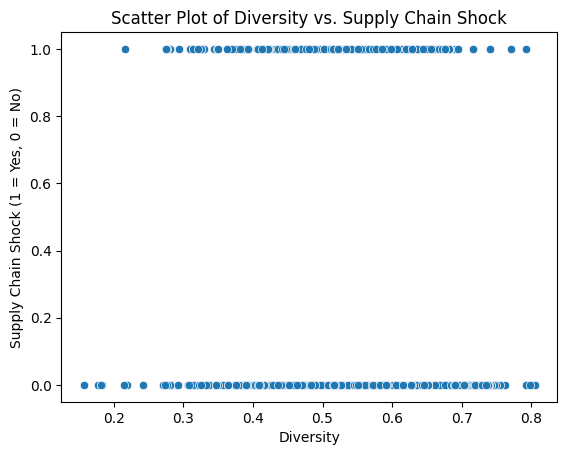

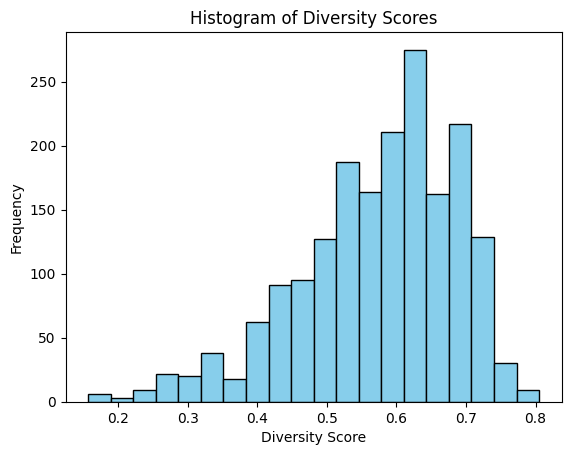

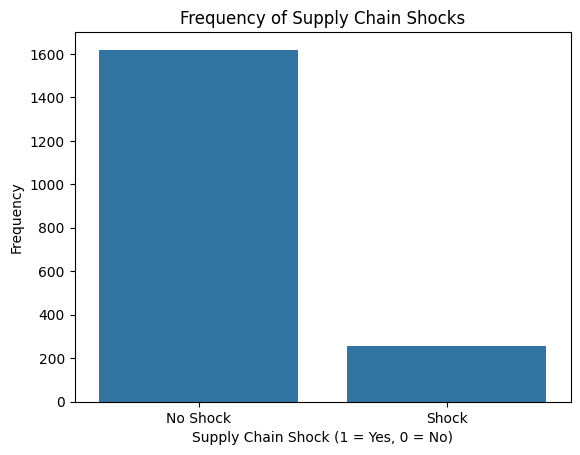

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
sns.scatterplot(x='diversity', y='supply_chain_shock', data=df)
plt.title('Scatter Plot of Diversity vs. Supply Chain Shock')
plt.xlabel('Diversity')
plt.ylabel('Supply Chain Shock (1 = Yes, 0 = No)')
plt.show()

plt.hist(df['diversity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Diversity Scores')
plt.xlabel('Diversity Score')
plt.ylabel('Frequency')
plt.show()

shock_counts = df['supply_chain_shock'].value_counts()
sns.barplot(x=shock_counts.index, y=shock_counts.values)
plt.title('Frequency of Supply Chain Shocks')
plt.xlabel('Supply Chain Shock (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Shock', 'Shock'])
plt.show()


